In [1]:
import numpy as np
import matplotlib.pyplot as plt

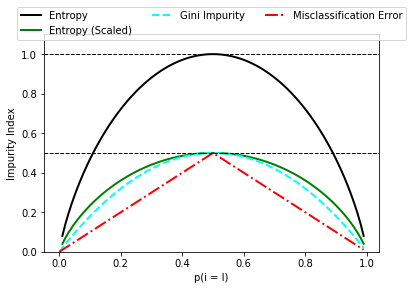

In [6]:
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))
def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2((1-p))
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (Scaled)', 'Gini Impurity', 'Misclassification Error'], 
                        ['-', '-', '--', '-.'], ['black', 'green', 'cyan', 'red']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 3, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim([0, 1.1])
plt.xlabel('p(i = l)')
plt.ylabel('Impurity Index')
plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y= iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


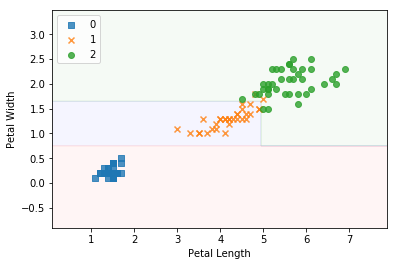

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(x_train, y_train)
plot_decision_region(x_train, y_train, tree)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', feature_names = ['Petal Length', 'Petal Width'])